In [662]:
import pandas as pd
import plotly.express as px
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

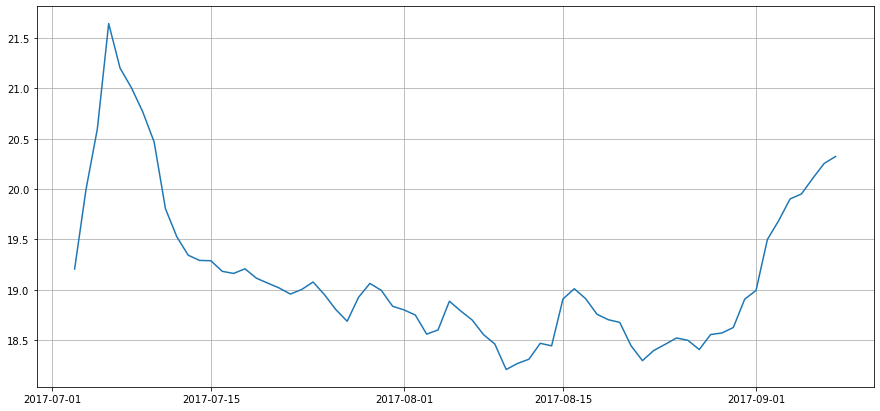

In [701]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv', delimiter=";", decimal=",")
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y', dayfirst=True)
data.set_index('Date', inplace=True)


plt.figure(figsize=(15, 7))
plt.plot(data.P3)
plt.grid(True)
plt.show()

In [702]:
data

,P3,T,j,A,R,IN1,IN2,OUT
Date,,,,,,,,
2017-07-03,19.207,22.3,46,0.90,0.0,25.23,8.17,0.00
2017-07-04,19.995,23.1,45,0.82,0.0,35.39,9.76,3.66
2017-07-05,20.597,23.0,46,0.74,0.0,0.00,0.00,17.51
2017-07-06,21.644,24.0,67,0.66,0.1,11.00,9.43,7.78
2017-07-07,21.202,24.0,46,0.58,0.1,20.31,0.00,5.08
...,...,...,...,...,...,...,...,...
2017-09-04,19.903,19.7,76,0.00,0.0,31.98,0.00,5.25
2017-09-05,19.952,20.0,58,0.00,0.0,36.19,0.00,4.51
2017-09-06,20.108,18.7,74,0.00,0.0,31.51,0.00,2.86


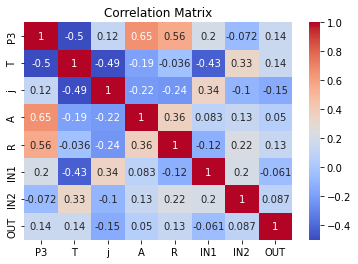

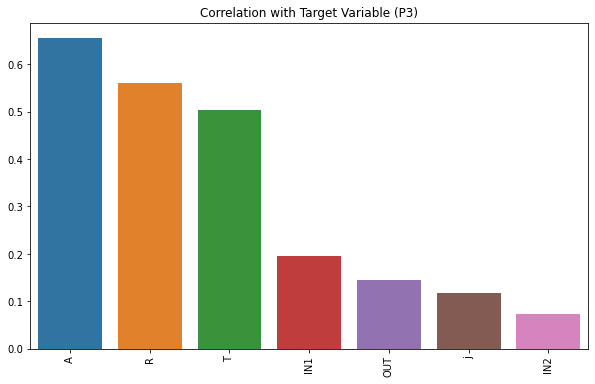

Top Features: Index(['A', 'R', 'T', 'IN1', 'OUT'], dtype='object')


In [703]:
# Вычисление корреляции
correlation_matrix = data.corr()

# Отобразить матрицу корреляции
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Вычисление корреляции между признаками и целевой переменной
target_correlation = correlation_matrix['P3'].drop('P3')
target_correlation_abs = target_correlation.abs()
sorted_correlation = target_correlation_abs.sort_values(ascending=False)

# Отобразить корреляцию между признаками и целевой переменной
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values)
plt.title('Correlation with Target Variable (P3)')
plt.xticks(rotation=90)
plt.show()

# Выбор наиболее значимых признаков
top_features = sorted_correlation.index[:5]
print('Top Features:', top_features)


In [704]:
X = data.drop('P3', axis=1)
y = data['P3']

n_days = len(X)
test_days = 12
split_index = n_days - test_days

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [705]:
X_train.shape

(56, 7)

In [706]:
X_test.shape

(12, 7)

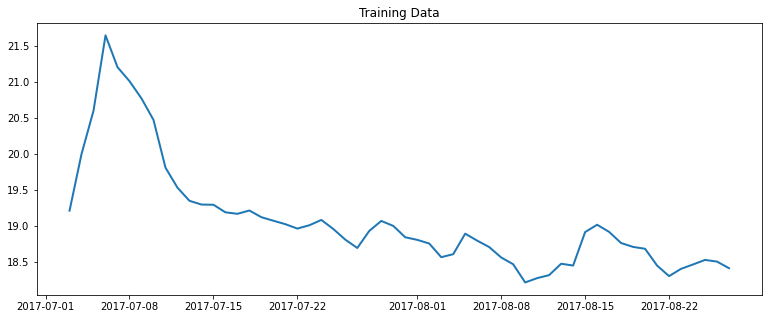

In [707]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(X_train.index, y_train, linewidth=2)
ax.set_title('Training Data')
plt.show()


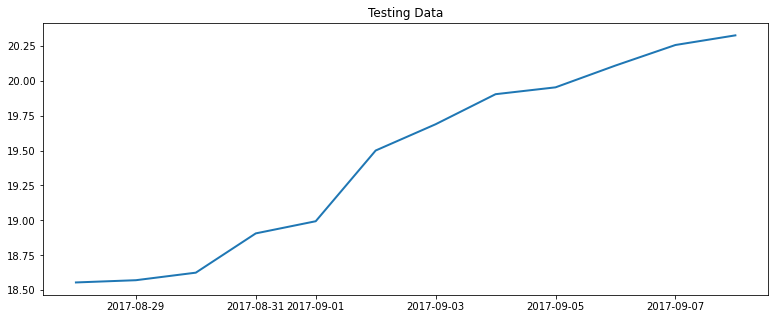

In [708]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(X_test.index, y_test, linewidth=2)

ax.set_title('Testing Data')
plt.show()

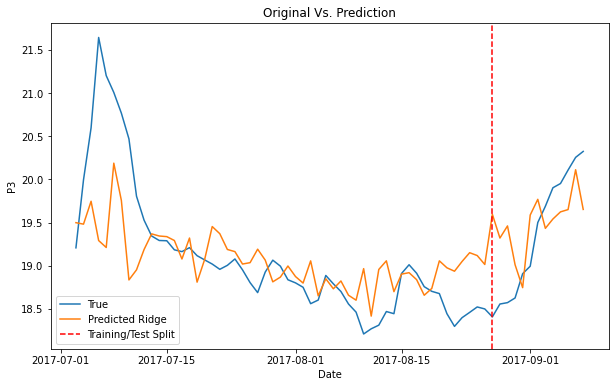

R^2: 0.42138970226204886
MAPE: 2.2817164431156294
MSE: 0.24654026668764406


In [750]:
regression_model = Ridge(60)
regression_model.fit(X_train, y_train)

predicted_ = regression_model.predict(X)
df_predicted = pd.DataFrame(index=data.index) 
df_predicted['Close'] = y
df_predicted['Predicted'] = predicted_

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_predicted.index, df_predicted['Close'], label='True')
ax.plot(df_predicted.index, df_predicted['Predicted'], label='Predicted Ridge')
ax.axvline(X_train.index[-1], color='r', linestyle='--', label='Training/Test Split')
ax.set_title('Original Vs. Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('P3')
ax.legend()
plt.savefig("pred.png", dpi=300, bbox_inches="tight")
plt.show()


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

predicted = regression_model.predict(X_test)

r2 = r2_score(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
mape = np.mean(np.abs((y_test - predicted) / y_test)) * 100

print('R^2:', r2)
print('MAPE:', mape)
print('MSE:', mse)

In [732]:
def plotCoefficients(model):

    coefs = pd.DataFrame(regression_model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)

    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

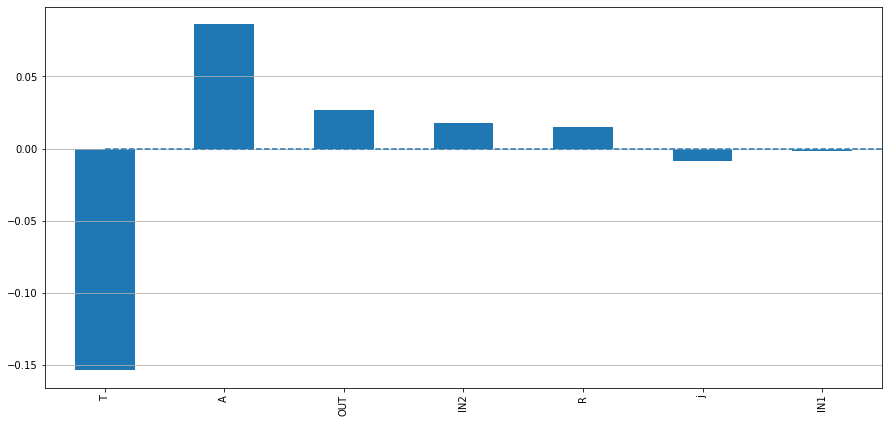

In [733]:
plotCoefficients(regression_model)

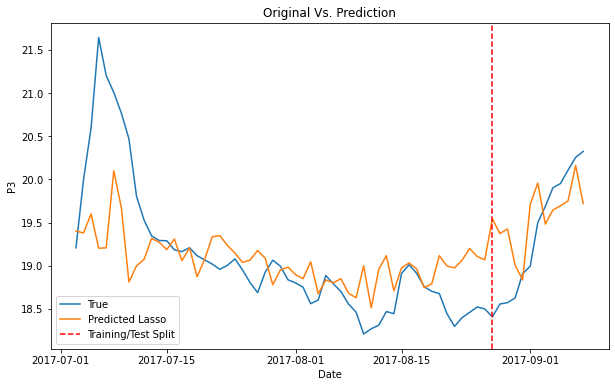

R^2: 0.4243704927464399
MAPE: 2.1981801031985673
MSE: 0.24527018061445324


In [751]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lasso_model = Lasso(0.2)
lasso_model.fit(X_train, y_train)

predicted_1 = lasso_model.predict(X)
df_predicted1 = pd.DataFrame(index=data.index)
df_predicted1['Close'] = y
df_predicted1['Predicted'] = predicted_1

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_predicted1.index, df_predicted1['Close'], label='True')
ax.plot(df_predicted1.index, df_predicted1['Predicted'], label='Predicted Lasso')
ax.axvline(X_train.index[-1], color='r', linestyle='--', label='Training/Test Split')
ax.set_title('Original Vs. Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('P3')
ax.legend()
plt.savefig("pred.png", dpi=300, bbox_inches="tight")
plt.show()

predicted = lasso_model.predict(X_test)

r2 = r2_score(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
mape = np.mean(np.abs((y_test - predicted) / y_test)) * 100

print('R^2:', r2)
print('MAPE:', mape)
print('MSE:', mse)


Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5}


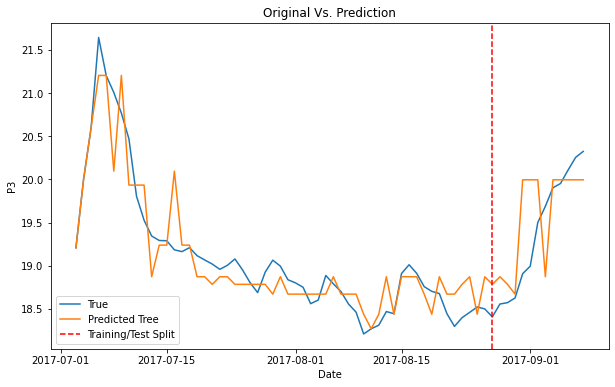

R^2: 0.32678662272818026
MAPE: 2.0778211331024847
MSE: 0.2868497263514875


In [813]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Диапазоны значений для гиперпараметров
param_grid = {
     'max_depth': [5, 7, 10, None],
    'min_samples_split': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 3, 4, 8],
    'max_features': ['log2'],
}

tree_model = DecisionTreeRegressor()

# GridSearchCV для настройки гиперпараметров
grid_search = GridSearchCV(tree_model, param_grid, cv=5)

# Поиск по сетке
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

tree_model = DecisionTreeRegressor(**best_params)
tree_model.fit(X_train, y_train)

tree_predicted = tree_model.predict(X_test)

tree_r2 = r2_score(y_test, tree_predicted)
tree_mse = mean_squared_error(y_test, tree_predicted)
mape = np.mean(np.abs((y_test - tree_predicted) / y_test)) * 100


tree_predicted_ = tree_model.predict(X)
df_predicted2 = pd.DataFrame(index=data.index)
df_predicted2['Close'] = y
df_predicted2['Predicted'] = tree_predicted_

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_predicted2.index, df_predicted2['Close'], label='True')
ax.plot(df_predicted2.index, df_predicted2['Predicted'], label='Predicted Tree')
ax.axvline(X_train.index[-1], color='r', linestyle='--', label='Training/Test Split')
ax.set_title('Original Vs. Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('P3')
ax.legend()
plt.savefig("pred.png", dpi=300, bbox_inches="tight")
plt.show()

print('R^2:', tree_r2)
print('MAPE:', mape)
print('MSE:', tree_mse)


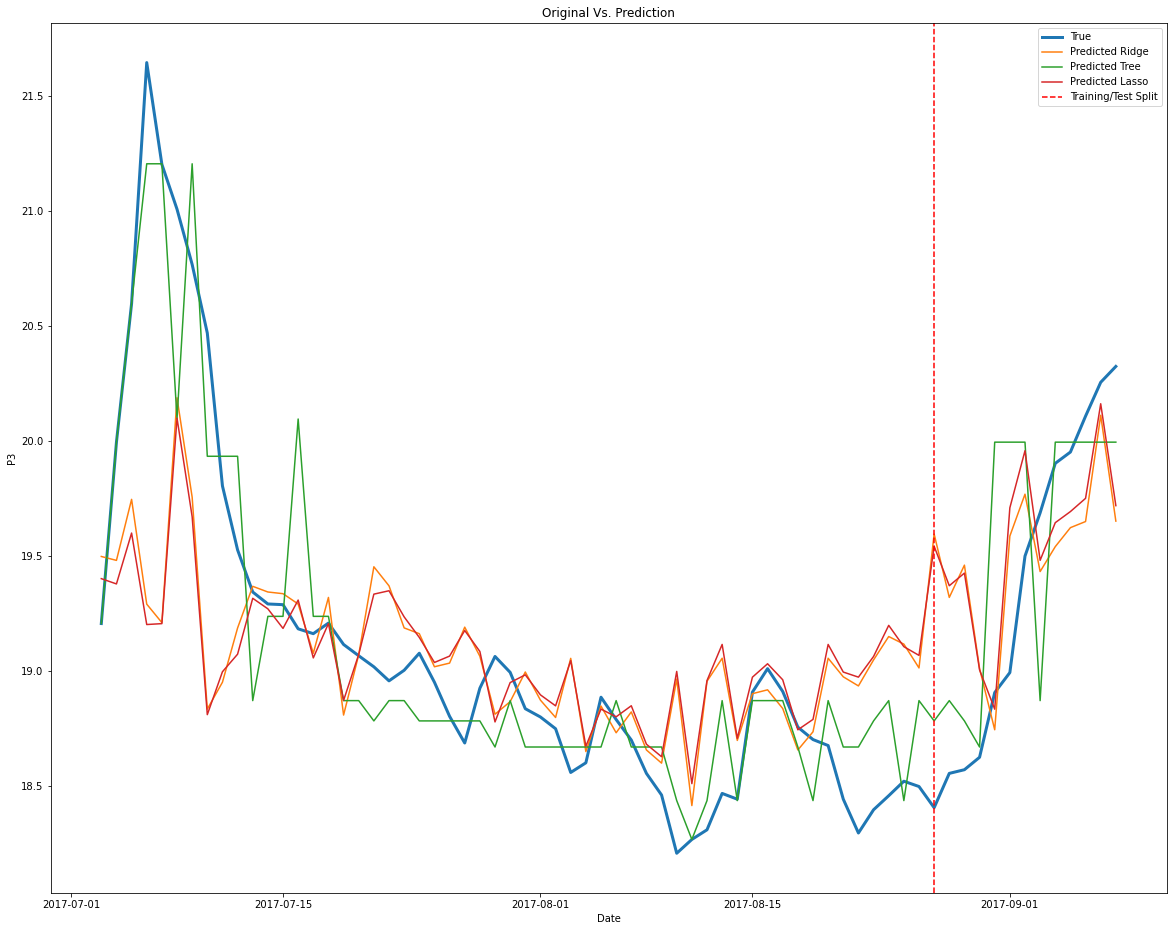

In [814]:

fig, ax = plt.subplots(figsize=(20, 16))
ax.plot(df_predicted.index, df_predicted['Close'], label='True', linewidth=3)
ax.plot(df_predicted.index, df_predicted['Predicted'], label='Predicted Ridge')
ax.plot(df_predicted2.index, df_predicted2['Predicted'], label='Predicted Tree')
ax.plot(df_predicted1.index, df_predicted1['Predicted'], label='Predicted Lasso')
ax.axvline(X_train.index[-1], color='r', linestyle='--', label='Training/Test Split')
ax.set_title('Original Vs. Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('P3')
ax.legend()
plt.savefig("pred.png", dpi=300, bbox_inches="tight")
plt.show()

